In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [45]:
dados_tratados = "../data_sampling/dados_tratados/%s"
dados_brutos = "../data_sampling/dados_brutos/%s"

In [46]:
df = pd.read_parquet(dados_tratados%"df.parquet")

In [47]:
vars  = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges"                
]

In [48]:
df[vars].fillna(-1, inplace=True)

C:\Users\Renan\AppData\Local\Temp\ipykernel_35556\1003586000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[vars].fillna(-1, inplace=True)


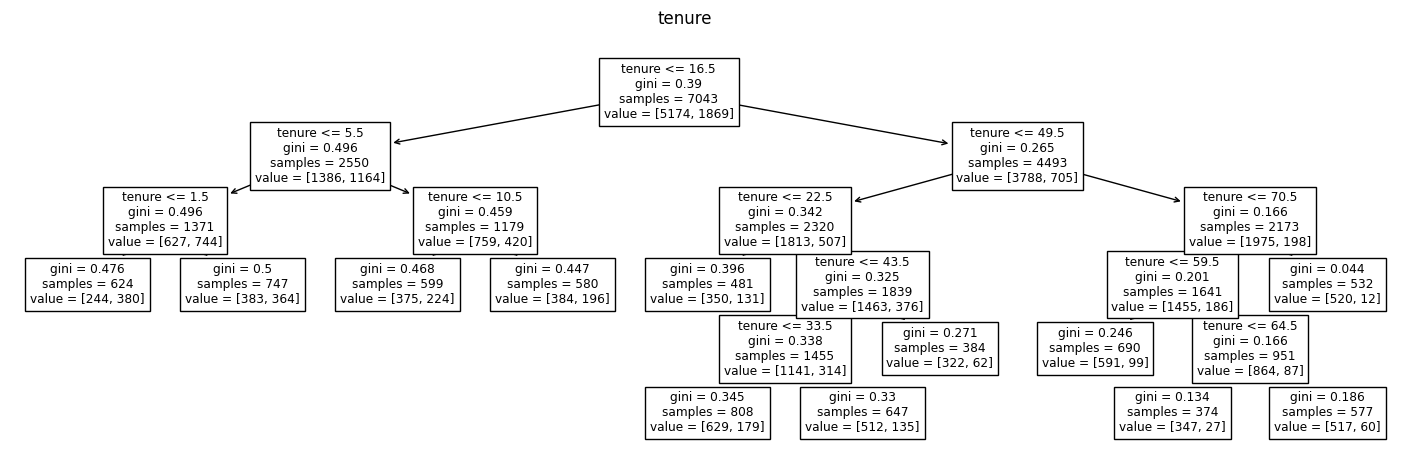

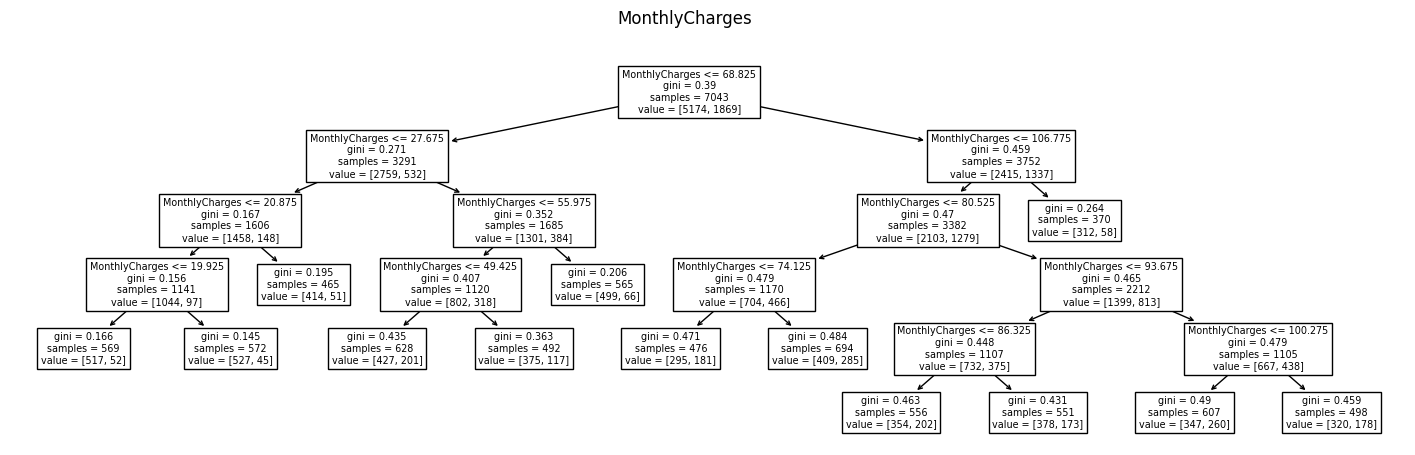

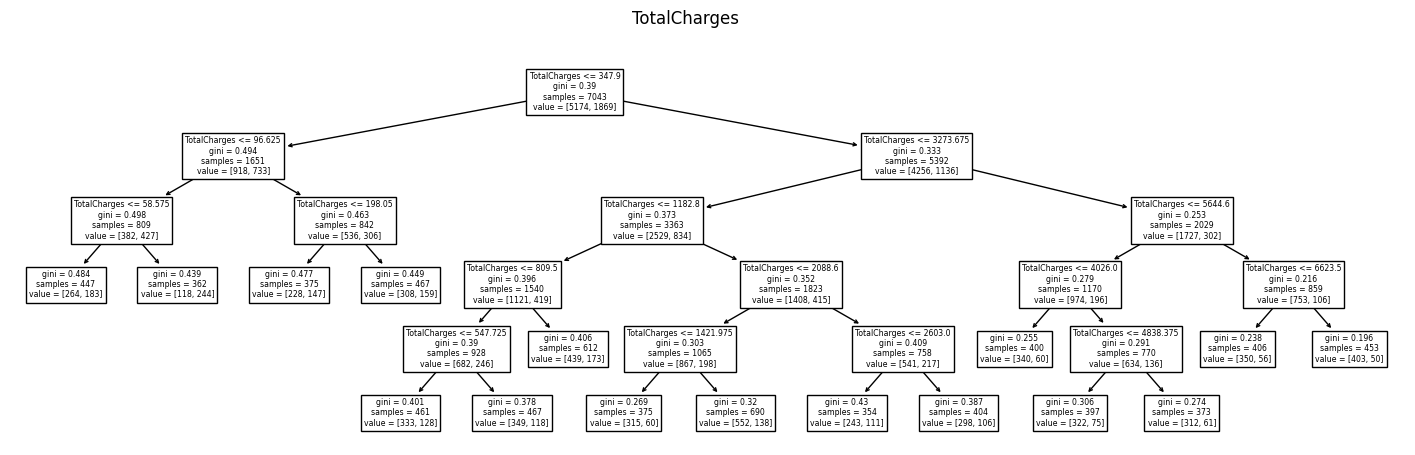

In [49]:
for v in vars:
    fig, ax = plt.subplots(figsize=(18,5))
    model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=int(len(df)*.05), random_state=42)
    model.fit(df[v].values.reshape(-1,1), df["resp"].values)
    tree.plot_tree(model, feature_names=[v], ax=ax)
    fig.suptitle(v)

In [50]:
cat_num = {
"tenure" : [
    -np.inf, 1.5, 10.5, 22.5, 33.5, 45.5, 59.5, 64.5, np.inf],
"MonthlyCharges" : [
    -np.inf,19.925, 20.875, 49.425, 55.975, 74.125, 86.325, 100.275, np.inf],
"TotalCharges" : [
    -np.inf, 58.575, 96.625, 365.725, 1240.525, 2108.85, 4026, 4838.375, 6976, np.inf]}

In [51]:
for k,v in cat_num.items():
    df[k] = pd.cut(df[k], v)
    df[k] = df[k].astype(str)

In [52]:
df.to_parquet(dados_tratados%"df_cat.parquet")

In [53]:
import pickle
with open('../notebooks/artefatos/cat_num.pickle', 'wb') as handle:
    pickle.dump(cat_num, handle, protocol=pickle.HIGHEST_PROTOCOL)